In [1]:
from additional_test_set import AdditionalTestSet

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.ensemble import BalancedRandomForestClassifier

from simple_ml_models import *
from utils import *
from additional_test_set_visualisation import Visualisation
from dimension_reduction import display_umap_2d_plot, display_pca_2d_plot, display_tsne_2d_plot

2023-05-26 17:50:31.808450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_path = "data/CTC_new_28_12_2022/countsTrainNew.tsv"
test_data_path = "data/CTC_new_28_12_2022/countsTestNew.tsv"
train_classes_path = "data/CTC_new_28_12_2022/sampleInfoTrain.tsv"
test_classes_path = "data/CTC_new_28_12_2022/sampleInfoTest.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 29154
CTC cells number in train data: 1534
WBC cells number in train data: 27620
CTC-WBC cells number in test data: 0

Total cells number in test data: 357
CTC cells number in test data: 262
WBC cells number in test data: 81
CTC-WBC cells number in test data: 14


In [3]:
cut_by_mean_train_data, cut_by_mean_test_data = AdditionalTestSet.cut_data_by_mean(
    data_object.train_data, data_object.test_data, threshold=0.6
)
(
    cut_by_mean_max_train_data,
    cut_by_mean_max_test_data,
) = AdditionalTestSet.cut_data_by_max(
    cut_by_mean_train_data, cut_by_mean_test_data, threshold=7
)
print(f"Feature number: {len(cut_by_mean_max_train_data.columns)}")

Feature number: 46


In [4]:
calculate_global_statistics(cut_by_mean_max_train_data, data_object.train_classes)

CTC mean: 0.4373665308215022
WBC mean: 1.2744774043271798
CTC standard deviation: 0.9740472308696775
WBC standard deviation: 1.100896074935635
CTC non-zero values: 27.52820134912987 %
WBC non-zero values: 60.12797909517363 %
T-test p-values: 0.0


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


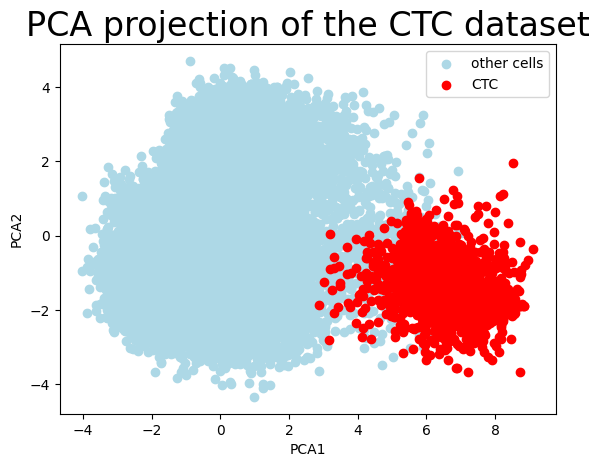

In [5]:
display_pca_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

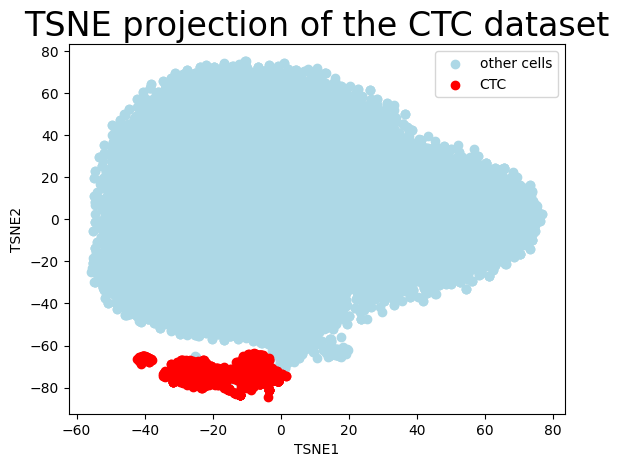

In [6]:
display_tsne_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

In [7]:
cut_by_mean_with_classes_train_data, cut_by_mean_with_classes_test_data = data_object.cut_data_by_mean_with_classes(
    data_object.train_data, data_object.test_data, threshold=0.5
)
print(f"Feature number: {len(cut_by_mean_with_classes_train_data.columns)}")

Feature number: 59


In [8]:
calculate_global_statistics(cut_by_mean_with_classes_train_data, data_object.train_classes)

CTC mean: 0.783926484496173
WBC mean: 1.1376248675477092
CTC standard deviation: 1.1229087708081462
WBC standard deviation: 1.1082728238979702
CTC non-zero values: 47.14273086867169 %
WBC non-zero values: 54.12106186870236 %
T-test p-values: 0.0


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


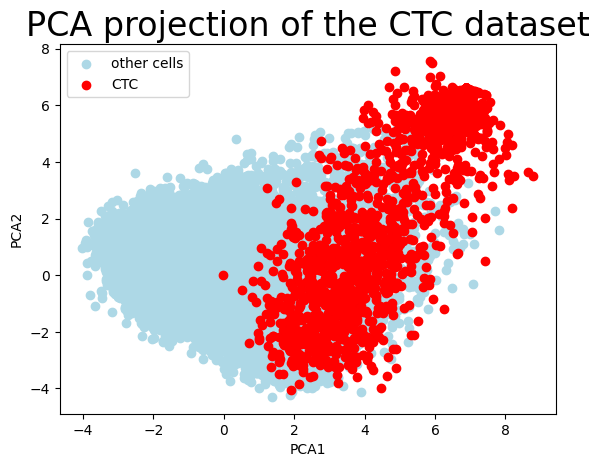

In [9]:
display_pca_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

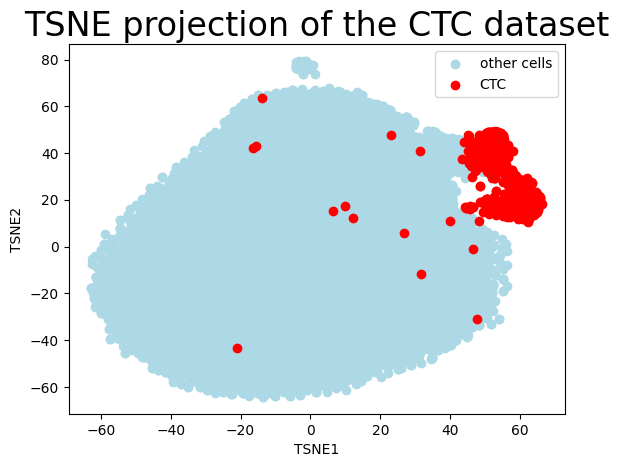

In [10]:
display_tsne_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

In [11]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
cut_by_mean_with_classes_features = np.array(cut_by_mean_with_classes_train_data.columns)
cut_by_mean_max_features = np.array(cut_by_mean_max_train_data.columns)
cut_by_mean_with_classes_common_features = np.intersect1d(biological_features, cut_by_mean_with_classes_features)
cut_by_mean_max_common_features = np.intersect1d(biological_features, cut_by_mean_max_features)

print(f"Common features for cut by mean with classes: {cut_by_mean_with_classes_common_features}")
print(f"Common features for cut by mean and max: {cut_by_mean_max_common_features}")

Common features for cut by mean with classes: []
Common features for cut by mean and max: []


### Biological features

In [12]:
biological_features = np.intersect1d(biological_features, data_object.train_data.columns)
biological_features_train_data = data_object.train_data[biological_features]
biological_features_test_data = data_object.test_data[biological_features]

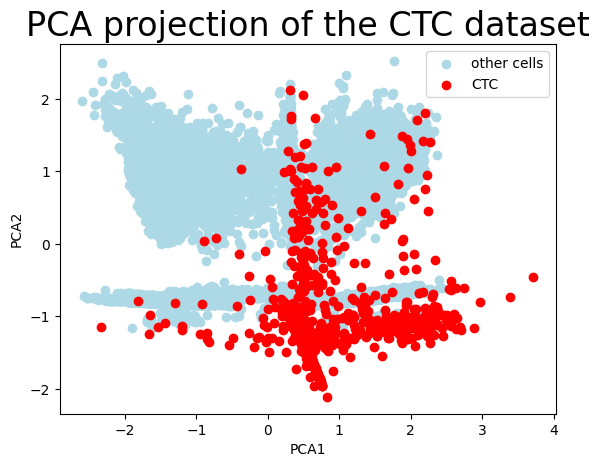

In [13]:
display_pca_2d_plot(biological_features_train_data, data_object.train_classes, 42)

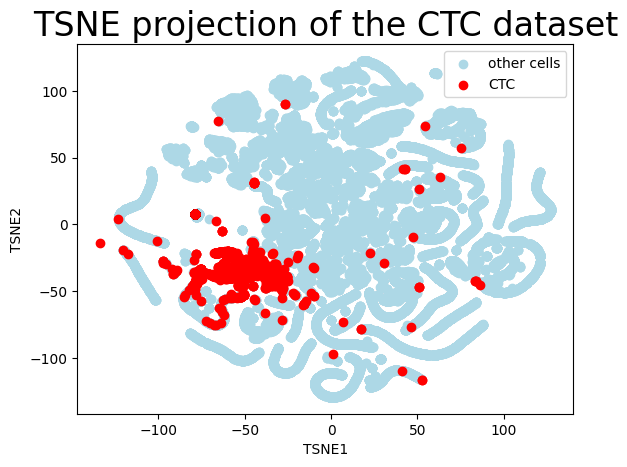

In [14]:
display_tsne_2d_plot(biological_features_train_data, data_object.train_classes, 42)

### Cut by mean max and biological

In [15]:
cut_by_mean_max_features_merged = np.concatenate((cut_by_mean_max_features, biological_features))
cut_by_mean_max_merged_train_data = data_object.train_data[cut_by_mean_max_features_merged]
cut_by_mean_max_merged_test_data = data_object.test_data[cut_by_mean_max_features_merged]

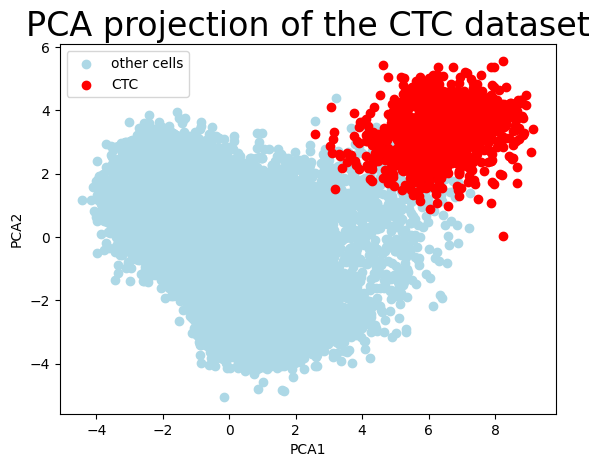

In [16]:
display_pca_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

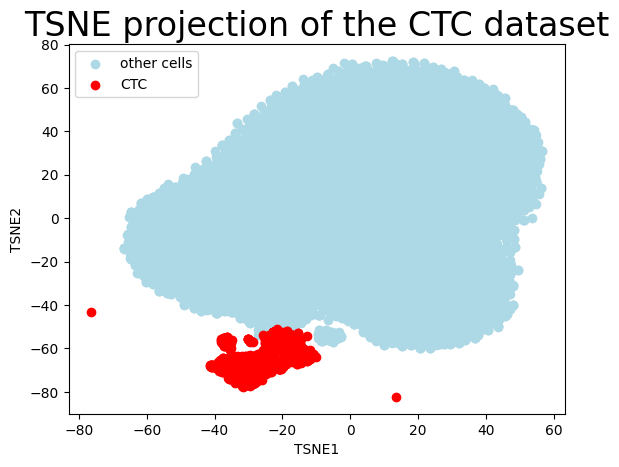

In [17]:
display_tsne_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

### Cut by mean with classes and biological

In [18]:
cut_by_mean_with_classes_features_merged = np.concatenate((cut_by_mean_with_classes_features, biological_features))
cut_by_mean_with_classes_merged_train_data = data_object.train_data[cut_by_mean_with_classes_features_merged]
cut_by_mean_with_classes_merged_test_data = data_object.test_data[cut_by_mean_with_classes_features_merged]

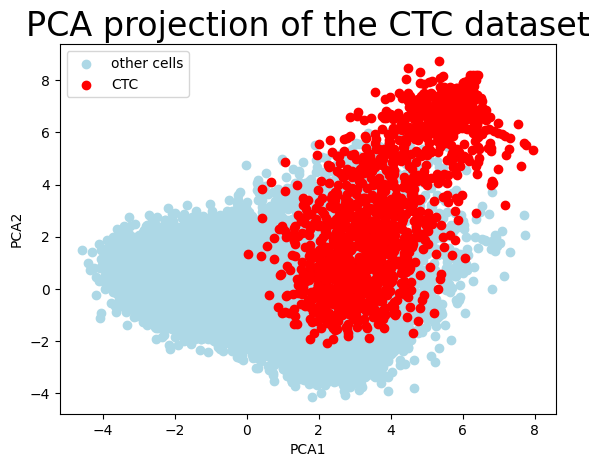

In [19]:
display_pca_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

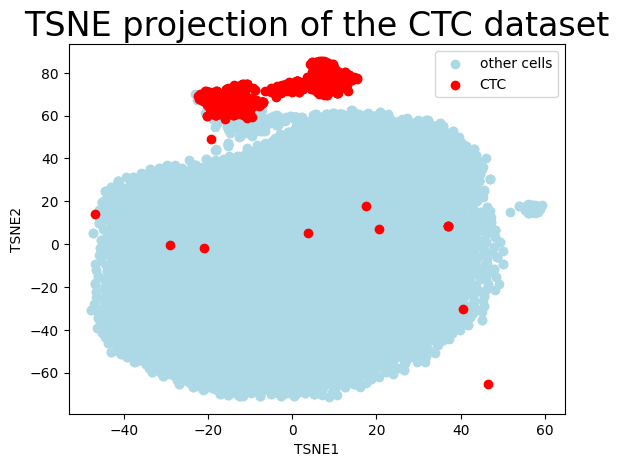

In [20]:
display_tsne_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

### LightGBM

In [21]:
lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    min_child_weight=0.01,
    max_depth=10,
    num_leaves=16,
    n_estimators=2000,
    subsample_for_bin=10000,
    is_unbalance=True,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [22]:
lgbm_model_object = Model(
    lgbm_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()


Validation balanced accuracy 0.9224260078387138
Training balanced accuracy 0.9481896015539556

Validation roc auc 0.9791181038843234
Training roc auc 0.9890001692286573

Validation precision 0.33843033225169933
Training precision 0.3503843533117208

Validation recall 0.9504647749510763
Training recall 1.0

Validation f1 0.4978613413146052
Training f1 0.5185321161937059



In [23]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.5012300948291286

Test roc auc 0.4638203017832647

Test precision 0.7738266178266179

Test recall 0.6485507246376812

Test f1 score 0.7047839161012948


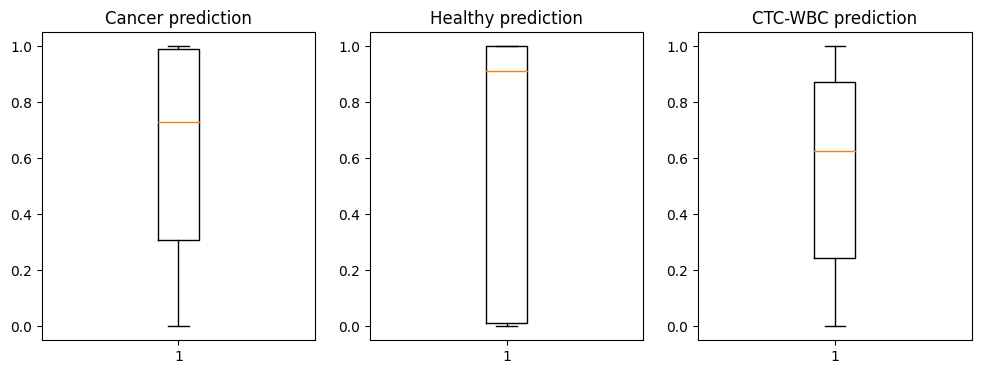

In [24]:
vis = Visualisation(lgbm_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

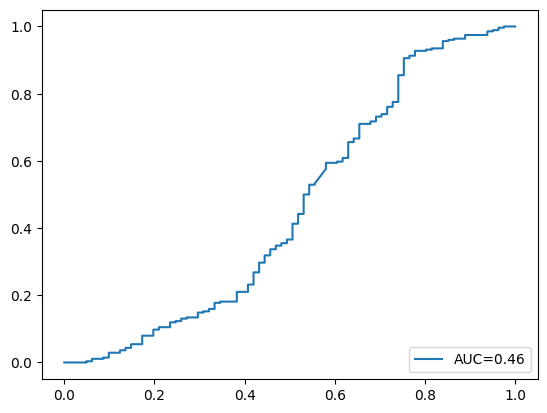

In [25]:
vis.draw_roc_curve_from_probabilities()

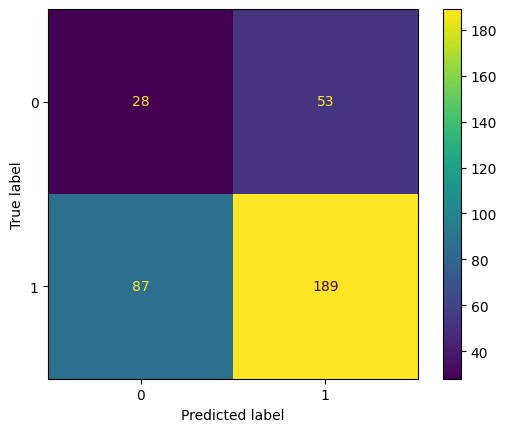

In [26]:
vis.display_confusion_matrix()

In [27]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
TWISTNB,19561.000000
MYCBP2-AS1,8751.000000
MYCBP,272.666667
MYC,235.666667
ZEB1,225.333333
SNAI3,162.000000
ZEB1-AS1,154.333333
MYCBP2,148.666667
ZEB2,143.333333
SNAI3-AS1,79.000000


### Cut by mean max and biological

In [28]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9975920921233133
Training balanced accuracy 1.0

Validation roc auc 0.9999871053045305
Training roc auc 1.0

Validation precision 0.9546709235425189
Training precision 1.0

Validation recall 0.9980443268917156
Training recall 1.0

Validation f1 0.9749337894731772
Training f1 1.0



In [29]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.7899445339058865

Test roc auc 0.8723683425776824

Test precision 0.9486426992024007

Test recall 0.7198067632850241

Test f1 score 0.8164503914238518


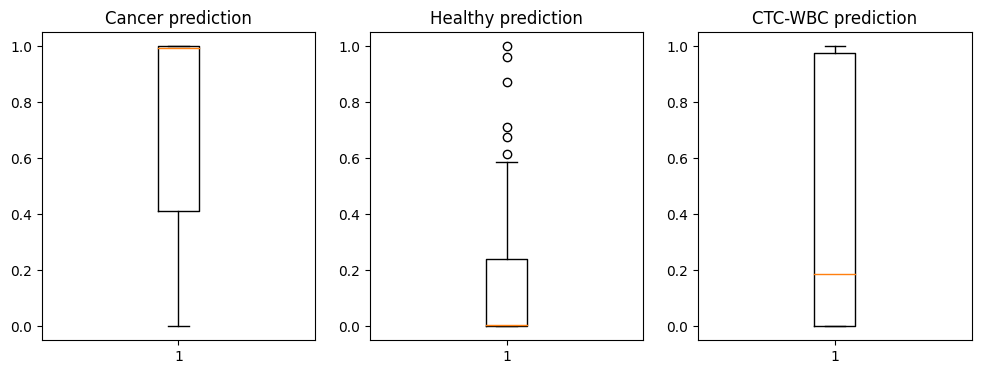

In [30]:
vis = Visualisation(lgbm_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

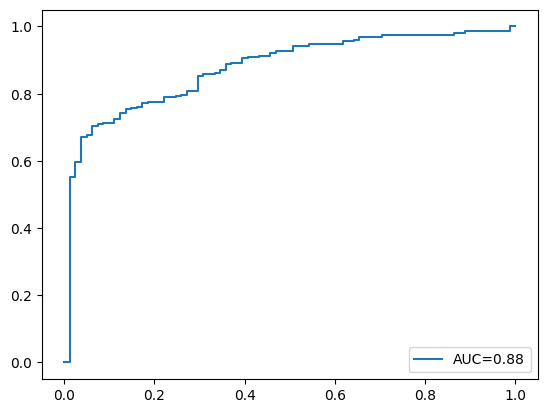

In [31]:
vis.draw_roc_curve_from_probabilities()

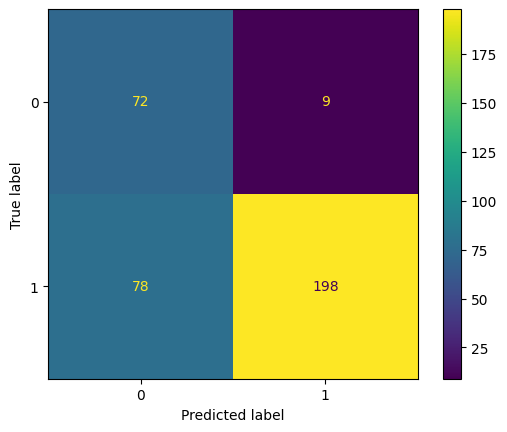

In [32]:
vis.display_confusion_matrix()

In [33]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
UBE2D3,710.333333
SRRM2,481.000000
PPIA,468.333333
NAP1L1,420.666667
RPS11,214.000000
TUBB4B,207.666667
HLA-E,206.333333
YWHAB,156.333333
KLF6,112.333333
MYCBP2-AS1,111.333333


### Cut by mean with classes and biological

In [34]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9985692884386301
Training balanced accuracy 1.0

Validation roc auc 0.9999963871740608
Training roc auc 1.0

Validation precision 0.995446485879078
Training precision 1.0

Validation recall 0.9973920111709068
Training recall 1.0

Validation f1 0.9964164014148092
Training f1 1.0



In [35]:
lgbm_model_object.display_test_results()

Test balanced accuracy 0.6685900876722132

Test roc auc 0.8141438539989264

Test precision 0.9314944314944315

Test recall 0.45652173913043476

Test f1 score 0.5890961168938142


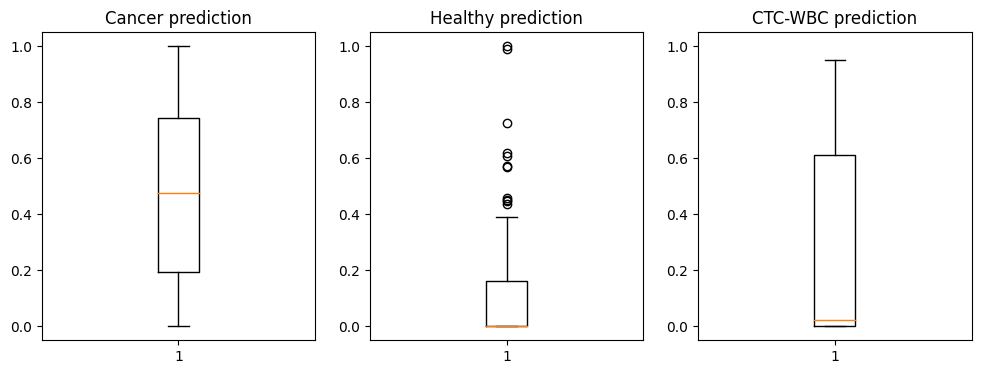

In [36]:
vis = Visualisation(lgbm_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

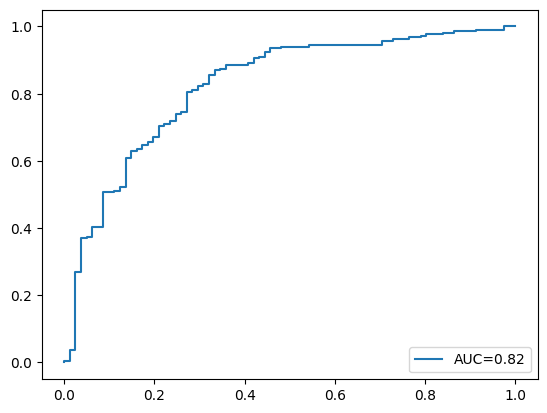

In [37]:
vis.draw_roc_curve_from_probabilities()

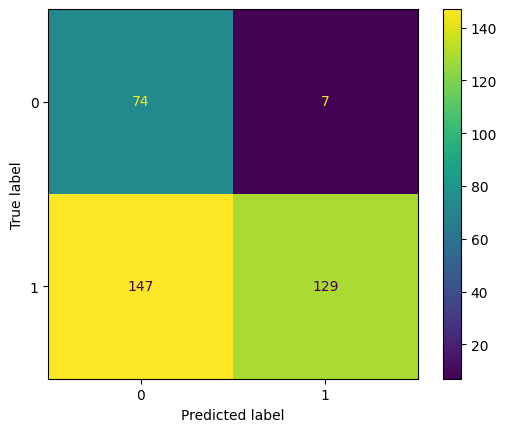

In [38]:
vis.display_confusion_matrix()

In [39]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
SRRM2,1193.333333
HLA-C,1009.333333
MYCBP2-AS1,227.000000
ACTB,207.666667
RPS15A,156.333333
...,...
CKLF,0.666667
SAP18,0.666667
SNAI1,0.333333
MYCBP,0.333333


### XGBoost

In [40]:
healthy_cells_train_indices = np.where(data_object.train_classes == 0)[0]
cancer_cells_train_indices = np.where(data_object.train_classes == 1)[0]

class_weight = len(healthy_cells_train_indices) / len(cancer_cells_train_indices)

xgb_clf = XGBClassifier(
    booster="gbtree",
    eta=0.2,
    min_child_weight=48,  # Jedyna zmiana w porownaniu do poprzedniego podzialu
    max_depth=8,
    gamma=0.01,   
    scale_pos_weight=class_weight,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [41]:
xgboost_model_object = Model(
    xgb_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9289124015976702
Training balanced accuracy 0.93644001910153

Validation roc auc 0.9816586540510146
Training roc auc 0.9852597998712426

Validation precision 0.31455575635060784
Training precision 0.3159542068325643

Validation recall 0.9784990622961512
Training recall 0.9931554673048266

Validation f1 0.4750426839318149
Training f1 0.4789770142937299



In [42]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.5470790839148326

Test roc auc 0.6446367865449991

Test precision 0.7984294236626036

Test recall 0.6702898550724637

Test f1 score 0.728290016433803


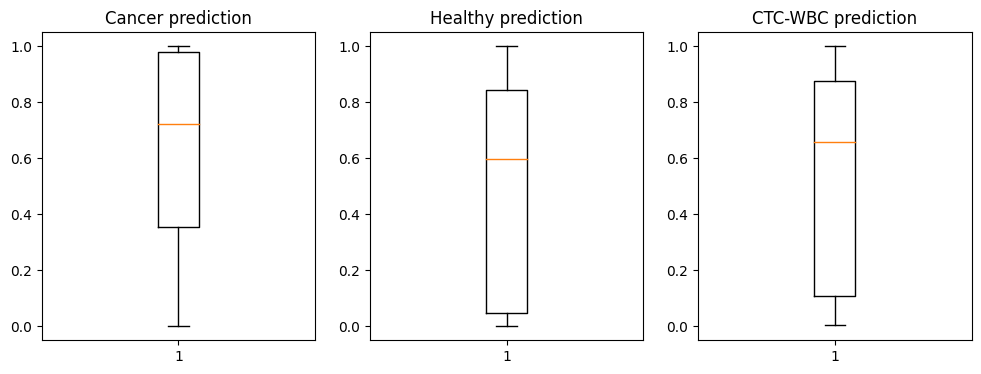

In [43]:
vis = Visualisation(xgboost_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

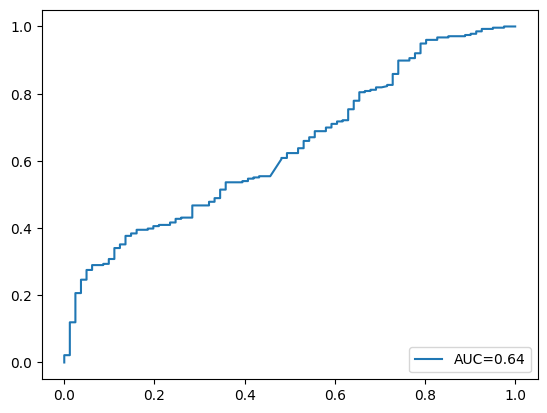

In [44]:
vis.draw_roc_curve_from_probabilities()

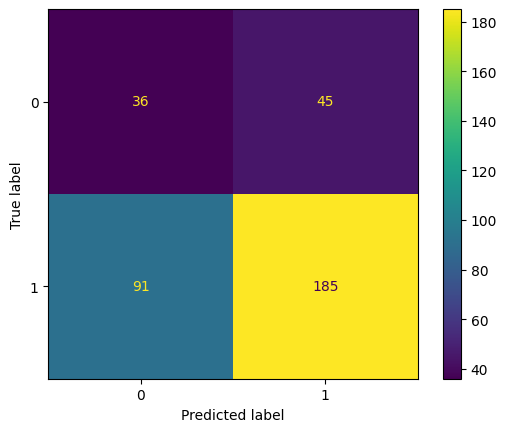

In [45]:
vis.display_confusion_matrix()

In [46]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
MYCBP2-AS1,0.445376
ZEB2,0.183184
MYCBP2,0.141025
ZEB1,0.086772
MYC,0.075853
MYCBP,0.022568
TWIST1,0.021019
TWISTNB,0.014296
SNAI3,0.009907


### Cut by mean max and biological

In [47]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9976463933529037
Training balanced accuracy 0.9989408342285598

Validation roc auc 0.9999236957530903
Training roc auc 0.9999841308883441

Validation precision 0.9377225319020653
Training precision 0.9687635255963464

Validation recall 0.9993476842791912
Training recall 0.9996738421395955

Validation f1 0.966081190972573
Training f1 0.9839674783165573



In [48]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.7216630882089818

Test roc auc 0.8451571539333212

Test precision 0.961099086099086

Test recall 0.5132850241545893

Test f1 score 0.6690291620524178


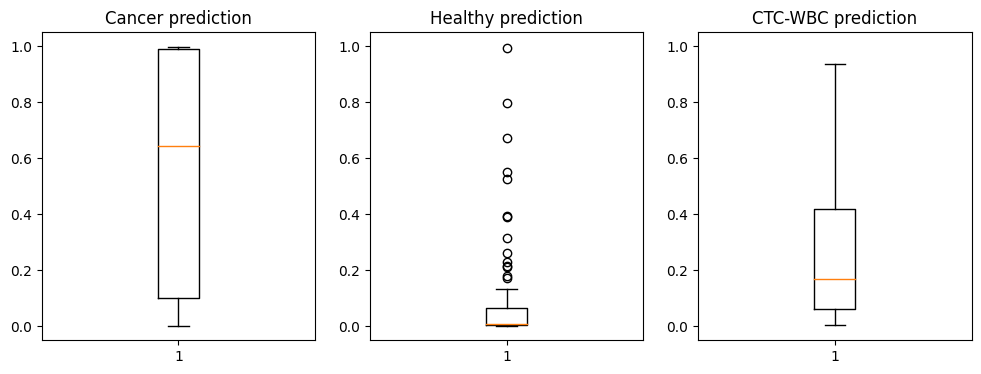

In [49]:
vis = Visualisation(xgboost_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

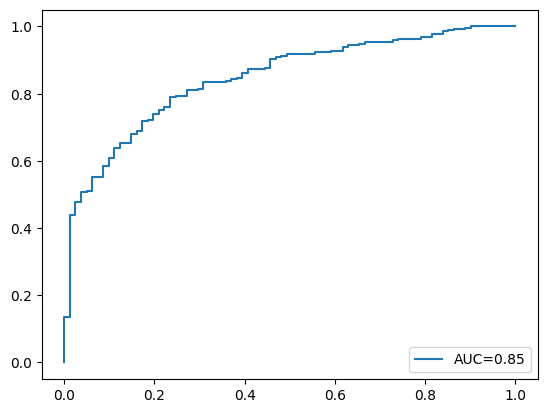

In [50]:
vis.draw_roc_curve_from_probabilities()

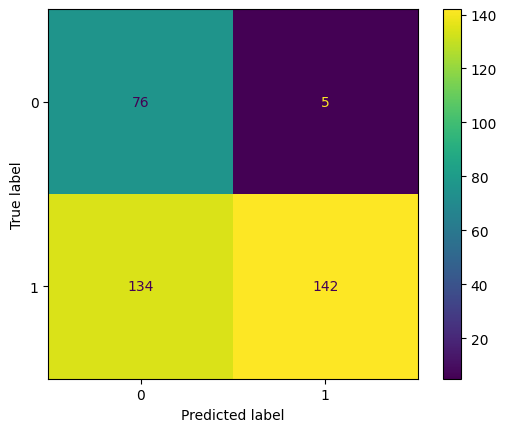

In [51]:
vis.display_confusion_matrix()

In [52]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL10,0.844558
RPL29,0.106558
HLA-E,0.014963
BTF3,0.010589
RPL15,0.006303
VIM,0.006299
KLF6,0.002103
TUBB4B,0.001675
TWISTNB,0.001413
MYCBP2-AS1,0.001280


### Cut by mean with classes and biological

In [53]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9975739683248827
Training balanced accuracy 0.9989409818435769

Validation roc auc 0.9999343357963474
Training roc auc 0.9999883790332085

Validation precision 0.9509674339197781
Training precision 0.963287461281479

Validation recall 0.9980443268917156
Training recall 1.0

Validation f1 0.9737730563939834
Training f1 0.9812952867173771



In [54]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.7756083378064055

Test roc auc 0.8776018369416115

Test precision 0.9594521888929783

Test recall 0.6582125603864735

Test f1 score 0.7690717525100609


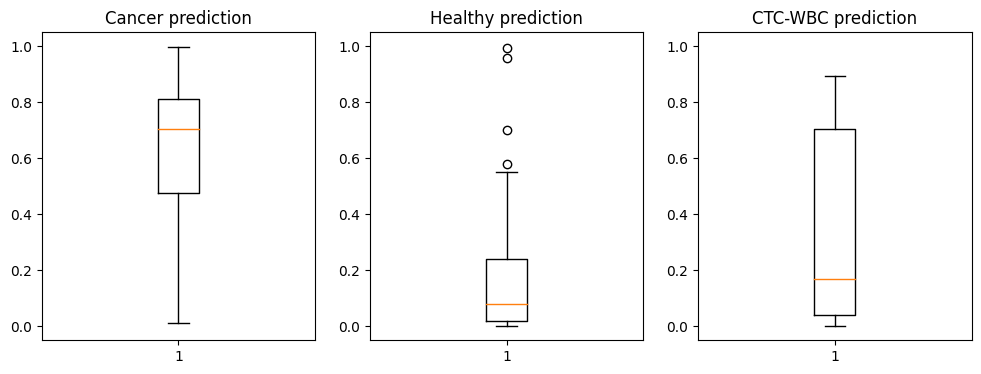

In [55]:
vis = Visualisation(xgboost_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

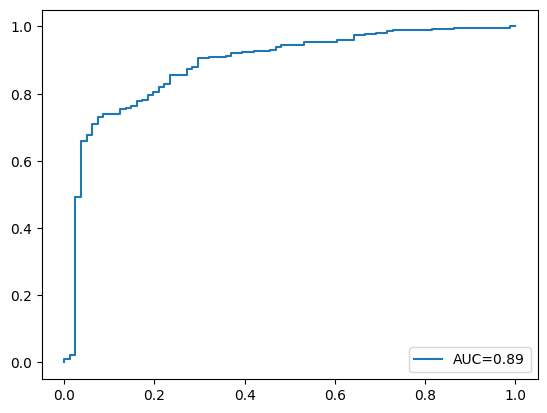

In [56]:
vis.draw_roc_curve_from_probabilities()

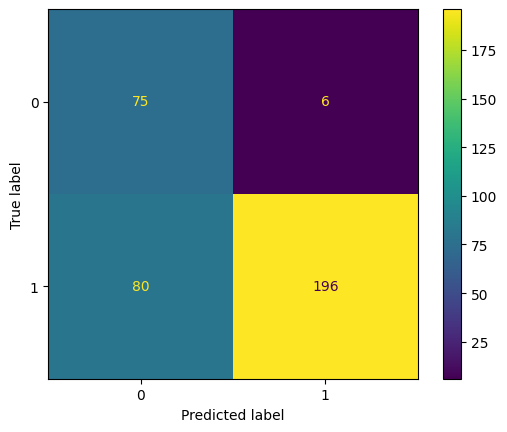

In [57]:
vis.display_confusion_matrix()

In [58]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL26,0.484555
RPS15A,0.356916
ZEB2,0.028254
RPL18,0.026004
RPS26,0.017766
MYCBP2-AS1,0.016508
ACTB,0.011828
ERH,0.010267
TWISTNB,0.007811
HLA-C,0.006226


### Random Forest

In [59]:
rf_clf = RandomForestClassifier(  
    criterion="log_loss",
    n_estimators=2000,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [60]:
rf_model_object = Model(
    rf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8696372045896728
Training balanced accuracy 0.8973342413466142

Validation roc auc 0.9779903784122171
Training roc auc 0.9887433339858734

Validation precision 0.9409109598258828
Training precision 1.0

Validation recall 0.7419174005218526
Training recall 0.7946684826932285

Validation f1 0.8273007977735422
Training f1 0.8852218422513021



In [61]:
rf_model_object.display_test_results()

Test balanced accuracy 0.499194847020934

Test roc auc 0.5405111230393035

Test precision 0.7697791872210477

Test recall 0.2946859903381643

Test f1 score 0.424644829963583


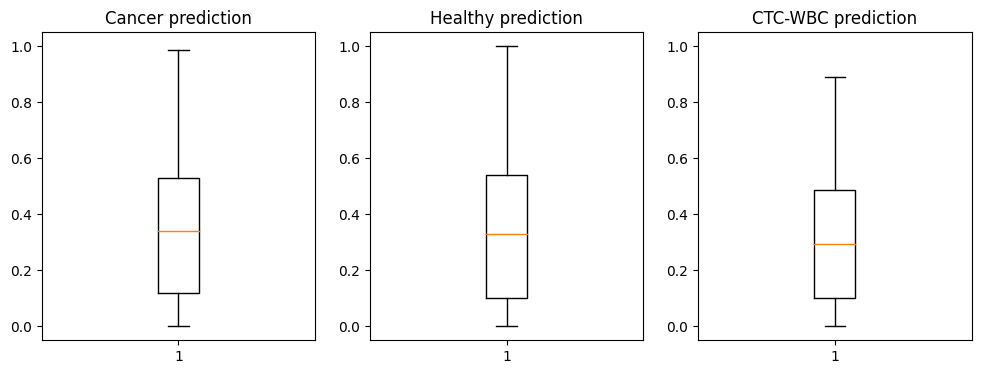

In [62]:
vis = Visualisation(rf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

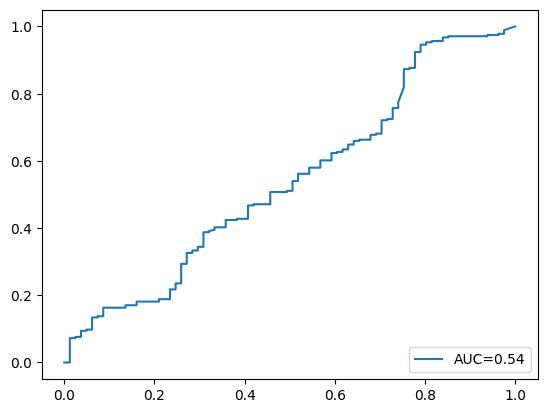

In [63]:
vis.draw_roc_curve_from_probabilities()

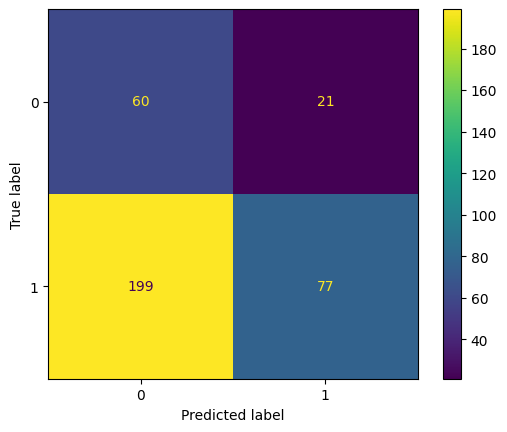

In [64]:
vis.display_confusion_matrix()

In [65]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
MYCBP2-AS1,0.421737
TWISTNB,0.174074
ZEB2,0.093460
MYCBP2,0.083503
MYC,0.060400
TWIST1,0.059613
ZEB1,0.035144
TWIST2,0.021306
ZEB1-AS1,0.015652
MYCBP,0.011909


### Cut by mean max and biological

In [66]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.9978271008680379
Training balanced accuracy 1.0

Validation roc auc 0.9999924899026387
Training roc auc 1.0

Validation precision 0.9922951231774761
Training precision 1.0

Validation recall 0.9960886537834313
Training recall 1.0

Validation f1 0.9941652132291153
Training f1 1.0



In [67]:
rf_model_object.display_test_results()

Test balanced accuracy 0.5849883700125246

Test roc auc 0.8237982346275422

Test precision 0.9583303624480095

Test recall 0.20289855072463767

Test f1 score 0.329939005994549


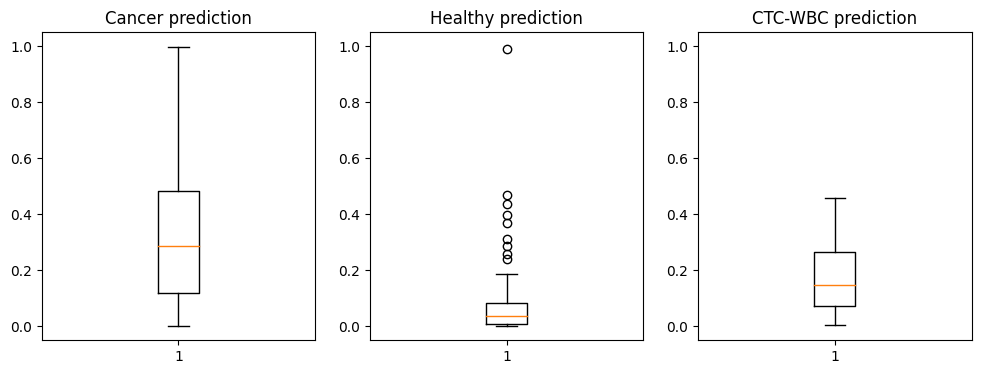

In [68]:
vis = Visualisation(rf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

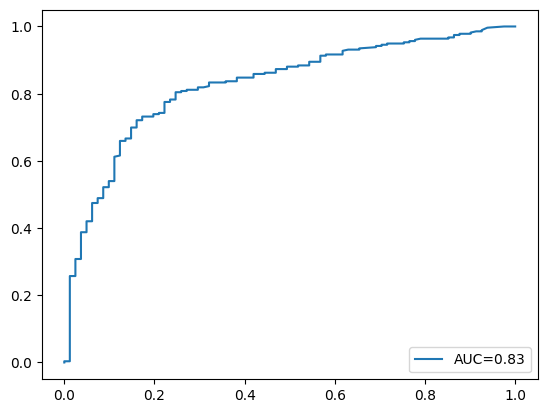

In [69]:
vis.draw_roc_curve_from_probabilities()

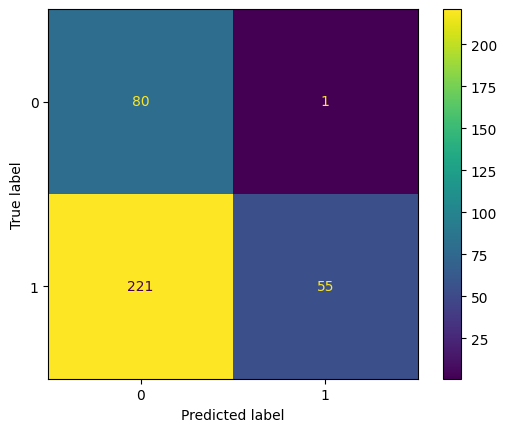

In [70]:
vis.display_confusion_matrix()

In [71]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL10,0.177304
HLA-E,0.150706
RPL29,0.139268
RPL15,0.100406
BTF3,0.072696
...,...
SNAI3-AS1,0.000014
MYCN,0.000012
SNAI1,0.000006
SNAI2,0.000004


### Cut by mean with classes and biological

In [72]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.9976470344108942
Training balanced accuracy 1.0

Validation roc auc 0.9999992916309468
Training roc auc 1.0

Validation precision 0.9973995958607581
Training precision 1.0

Validation recall 0.9954388861709068
Training recall 1.0

Validation f1 0.9964100111589351
Training f1 1.0



In [73]:
rf_model_object.display_test_results()

Test balanced accuracy 0.7426865271068169

Test roc auc 0.866411701556629

Test precision 0.9683818826675971

Test recall 0.5471014492753623

Test f1 score 0.6937965305903364


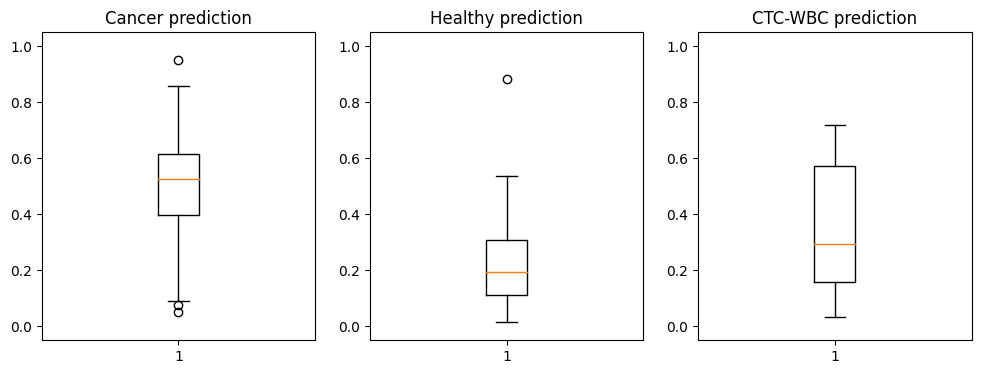

In [74]:
vis = Visualisation(rf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

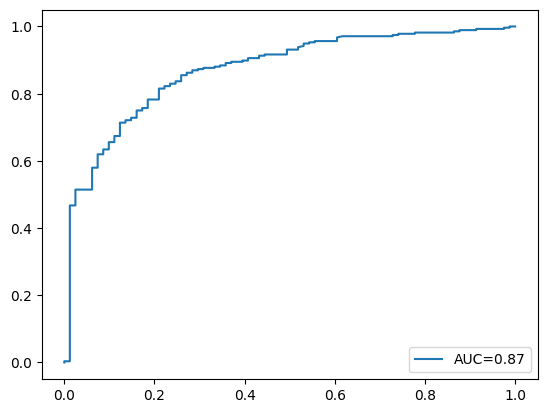

In [75]:
vis.draw_roc_curve_from_probabilities()

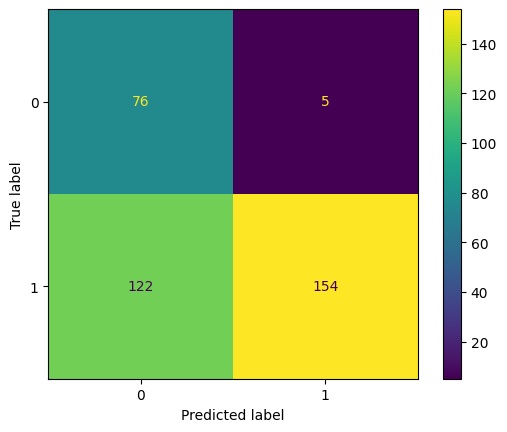

In [76]:
vis.display_confusion_matrix()

In [77]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPS15A,0.132933
RPL26,0.114159
HLA-C,0.105968
ACTB,0.104620
RPS26,0.083916
...,...
SNAI3-AS1,0.000029
SNAI2,0.000010
SNAI1,0.000006
MYCBPAP,0.000002


### Balanced Random Forest

In [78]:
brf_clf = BalancedRandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    criterion="entropy",
    oob_score=True,  
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [79]:
brf_model_object = Model(
    brf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9286047336510853
Training balanced accuracy 0.9419440982538642

Validation roc auc 0.9679810224450898
Training roc auc 0.9784398333564054

Validation precision 0.31911860515490104
Training precision 0.3253296794620654

Validation recall 0.9745889901337247
Training recall 1.0

Validation f1 0.479943274451945
Training f1 0.49044380159493484



In [80]:
brf_model_object.display_test_results()

Test balanced accuracy 0.5263687600644122

Test roc auc 0.5629063040496213

Test precision 0.7850852835293542

Test recall 0.6823671497584541

Test f1 score 0.7281864774881535


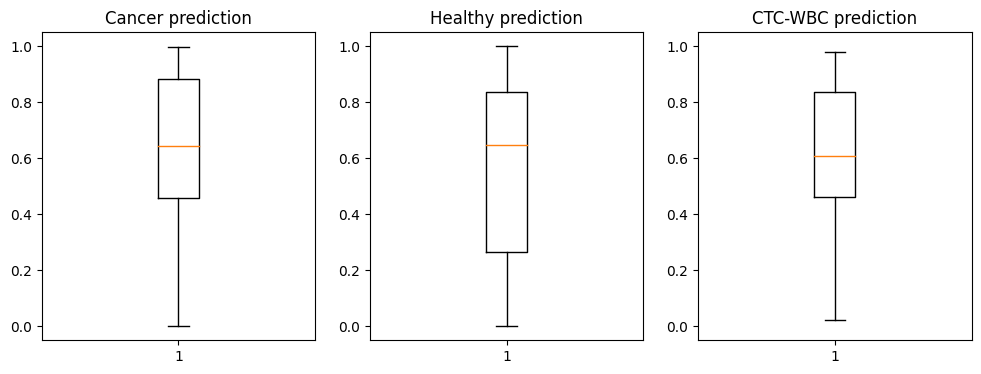

In [81]:
vis = Visualisation(brf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

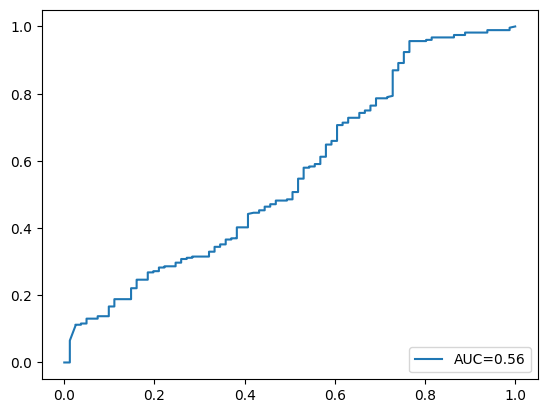

In [82]:
vis.draw_roc_curve_from_probabilities()

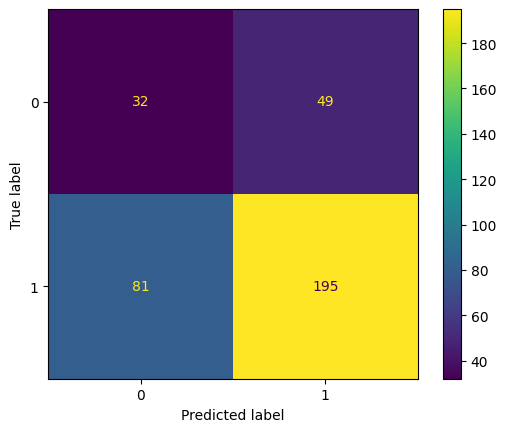

In [83]:
vis.display_confusion_matrix()

In [84]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.218285
MYCBP2-AS1,0.211462
MYCBP2,0.168427
TWISTNB,0.133367
MYC,0.103046
ZEB1,0.077419
MYCBP,0.020791
TWIST1,0.015680
SNAI3,0.011902
ZEB1-AS1,0.009970


### Cut by mean max and biological 

In [85]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9974834777678346
Training balanced accuracy 0.9991853778332359

Validation roc auc 0.9999702075854676
Training roc auc 0.9999990086890653

Validation precision 0.9335290723006014
Training precision 0.9715512447066049

Validation recall 0.9993476842791912
Training recall 1.0

Validation f1 0.9636214880871662
Training f1 0.9855568622503351



In [86]:
brf_model_object.display_test_results()

Test balanced accuracy 0.6781400966183574

Test roc auc 0.8080381105743425

Test precision 0.9357483595864405

Test recall 0.4673913043478261

Test f1 score 0.6213414769393608


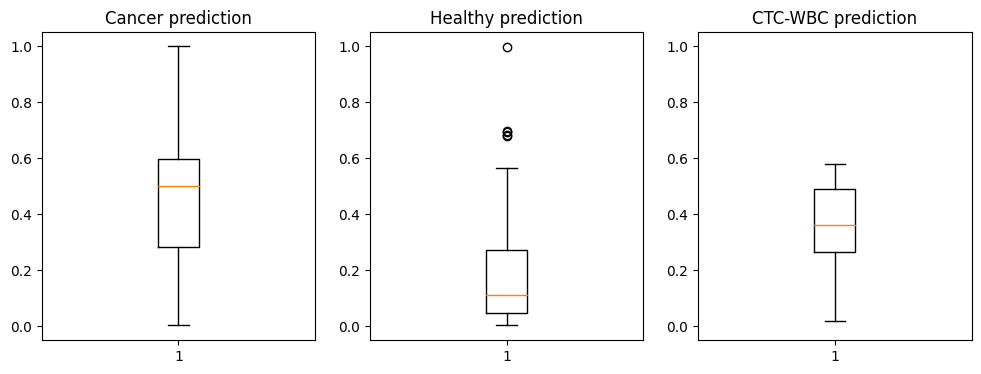

In [87]:
vis = Visualisation(brf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

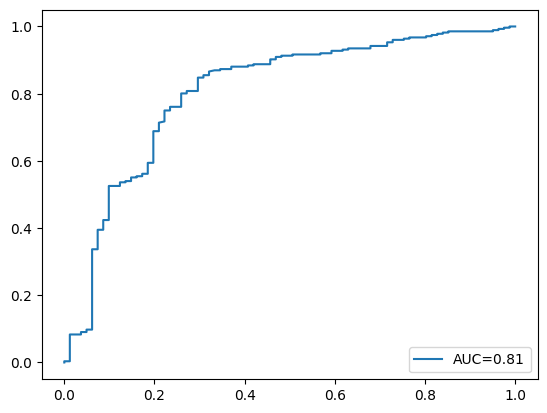

In [88]:
vis.draw_roc_curve_from_probabilities()

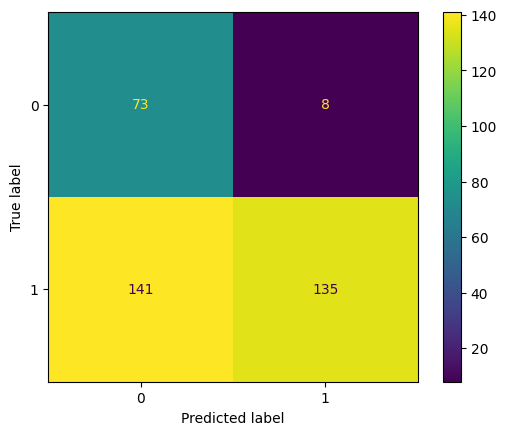

In [89]:
vis.display_confusion_matrix()

In [90]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL10,1.836786e-01
HLA-E,1.477389e-01
RPL29,1.410878e-01
BTF3,1.351509e-01
RPL15,6.510770e-02
...,...
SNAI1,1.553467e-05
SNAI3-AS1,8.345007e-06
MYCN,5.300982e-06
MYCBPAP,3.640183e-06


### Cut by mean with classes and biological

In [91]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9969950006789001
Training balanced accuracy 0.9983073833294487

Validation roc auc 0.9999600773460054
Training roc auc 0.9999997522376795

Validation precision 0.9074655262832713
Training precision 0.9426664782697193

Validation recall 1.0
Training recall 1.0

Validation f1 0.9501761524655222
Training f1 0.9704577111634031



In [92]:
brf_model_object.display_test_results()

Test balanced accuracy 0.7718509572374307

Test roc auc 0.886987833243872

Test precision 0.9003347420748216

Test recall 0.8852657004830918

Test f1 score 0.891336270638109


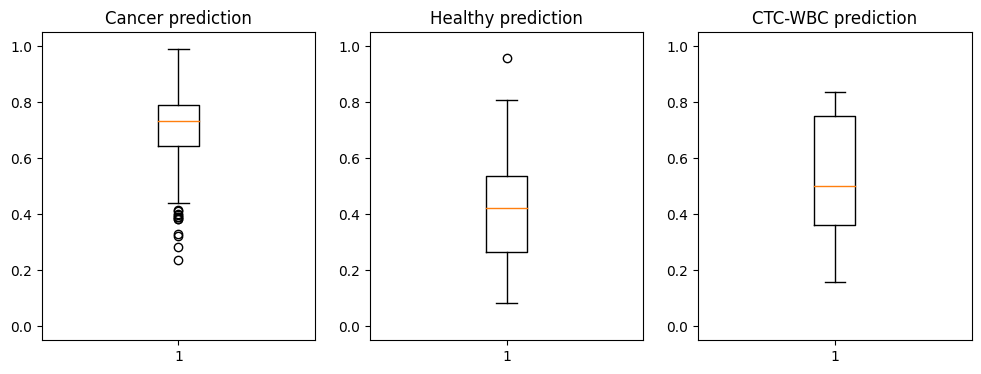

In [93]:
vis = Visualisation(brf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

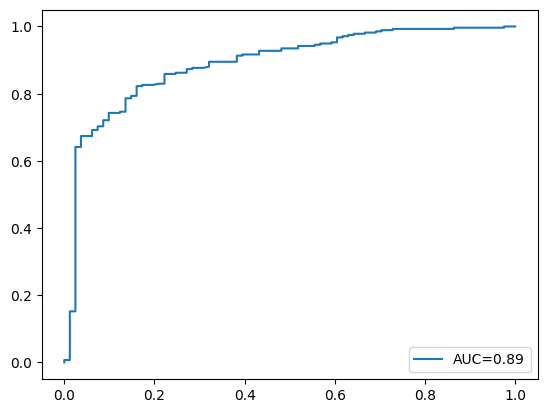

In [94]:
vis.draw_roc_curve_from_probabilities()

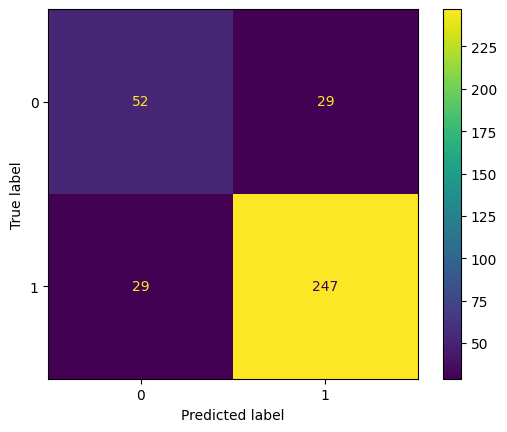

In [95]:
vis.display_confusion_matrix()

In [96]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
RPL26,0.143533
RPS15A,0.134824
RPS26,0.101351
ACTB,0.088537
HLA-C,0.080005
...,...
SNAI1,0.000081
SNAI3-AS1,0.000045
SNAI2,0.000011
MYCBPAP,0.000010
